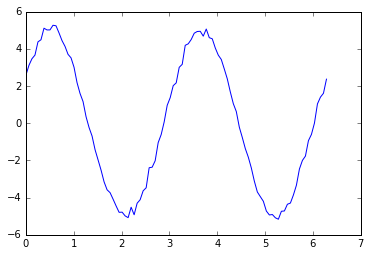

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal
from scipy.constants import pi

####################################################################################################

def g(x, k, phi):
    return 5*(np.sin(k*x + phi))

####################################################################################################

x = np.linspace(0, 2*pi, 101)
k = 2.
phi = pi/6.
err_floor = 0.1
meas_err = np.cos(x)*0.2
var = err_floor**2 + meas_err**2
unc = sqrt(var)
y = g(x, k, phi) + np.random.randn(x.shape[0])*unc

# print(meas_err, err_floor, var, unc)

coeffs, cov = curve_fit(g, x, y, p0 = [2, pi/6])
k_best = coeffs[0]
phi_best = coeffs[1]

plt.figure()
plt.plot(x, y)
plt.show()

####################################################################################################



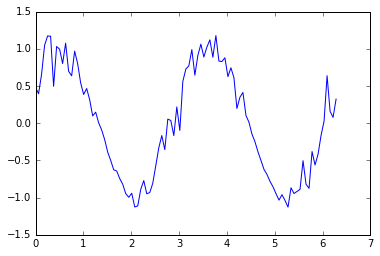

In [6]:
from scipy.constants import pi
x = np.linspace(0, 2*pi, 101)
k = 2.
phi = pi/6.
err = np.cos(x)*0.2
y = np.sin(k*x + phi) + np.random.randn(x.shape[0])*err
plt.plot(x, y)
plt.show()

In [1]:
from scipy.optimize import curve_fit

def g(x, k, phi):
    return np.sin(k*x + phi)

coeffs, cov = curve_fit(g, x, y, p0 = [2, pi/6])

# coeffs gives the best-fit m and b.
k_best = coeffs[0]
phi_best = coeffs[1]
print('Best-fit k and phi, respectively: {:.3f} {:.3f}'.format(k_best, phi_best))

# The diagonal elements of the covariance matrix are the variances of the two fitting parameters.
k_sig = np.sqrt(cov[0, 0])
phi_sig = np.sqrt(cov[1, 1])
print('1 sigma error on best-fit k and phi, respectively: {:.3f} {:.3f}'.format(k_sig,phi_sig))

print('The coeffs array:\n', coeffs)
print('And the covariance matrix:\n', cov)
plt.errorbar(x, y, yerr = err, fmt = 'x')
plt.plot(x, g(x, k_best, phi_best ))
plt.plot(x, y, '.')


import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

k_start, k_end = k_best-5*k_sig, k_best+5*k_sig
phi_start, phi_end = phi_best-5*phi_sig, phi_best+5*phi_sig
xx, yy = np.mgrid[k_start:k_end:0.001, phi_start:phi_end:0.001]
print(xx.min(),xx.max(), yy.min(), yy.max())
# Create a grid of 2d coordinates 
xy = np.dstack((xx, yy))

# create a 2d Gaussian according to the best-fit (m, b) and the covariance matrix.
gauss2d = multivariate_normal(coeffs, cov)
# find probability
P = gauss2d.pdf(xy)
# calculate CDF
CDF_cf = compute_cdf(P)
extent = [k_start, k_end, phi_start, phi_end ]
# plotting
plt.figure()
plt.contour(CDF_cf.T, extent = extent, levels = contour_levels, linestyles=['--', '--', '--'], exten)
plt.scatter(coeffs[0], coeffs[1], marker = 'x', facecolor = 'r', s = 100)
plt.show()

SyntaxError: non-keyword arg after keyword arg (<ipython-input-1-14b5bd33bb16>, line 45)